# An example of my Couzin Model implementation
The parameters used here are the same as in Moritz Maxeiners master thesis (Imitation learning of fish and swarm behavior with Recurrent Neural Networks)

In [1]:
%matplotlib inline
%config Completer.use_jedi = False
%load_ext autoreload
%autoreload 2

In [3]:
import matplotlib.pyplot as plt
import numpy as np

from fish_models.gym_interface import TrackGeneratorGym
from fish_models.models.pascals_lstms.couzin import ConstantSpeedCouzinModel

In [4]:
model = ConstantSpeedCouzinModel(
    speed_cm_s=8.0,
    zor=1.0,
    zoo=4.0,
    zoa=40.0,
    zowr=20.0,
    world_bounds=[[-50, -50], [50, 50]],
    max_angular_velocity_rad_s=np.pi / 4,
    fov=2 * 5 / 6 * np.pi,
    neighbours=None,
    noise=0.0,
    time_step_s=1 / 25,
)

In [5]:
generator = TrackGeneratorGym(model=model, world_size=[100, 100], frequency=25)

In [6]:
n_guppies = 8

# don't spawn guppies 20cm or closer to the walls
rng = np.random.default_rng()
initial_positions = rng.uniform(low=-30, high=30, size=(n_guppies, 2))
initial_orientations = rng.uniform(low=-np.pi, high=np.pi, size=(n_guppies, 1))
initial_poses = np.concatenate([initial_positions, initial_orientations], axis=1)

track = generator.create_track(
    n_guppies=n_guppies, trackset_len=1000, initial_poses=initial_poses
)
print(track.shape)

100%|██████████| 999/999 [00:03<00:00, 305.51it/s]

(8, 1000, 3)


In [7]:
#f = generator.as_io_file(track)
#f.save_as("__generated.hdf5")

(8, 1000, 3)


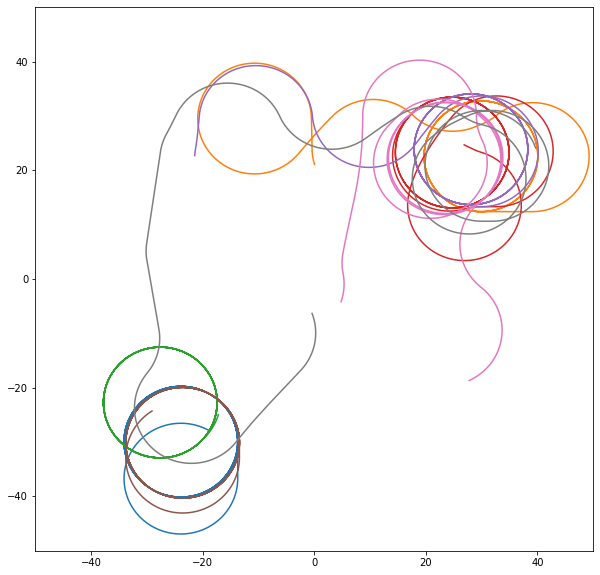

In [8]:
print(track.shape)
plt.figure(figsize=(10, 10))
plt.xlim(-50, 50)
plt.ylim(-50, 50)
for fish_id in range(track.shape[0]):
    plt.plot(
        track[fish_id, :, 0],
        track[fish_id, :, 1],
    )
plt.show()